Data fields

Here's a brief version of what you'll find in the data description file.

SalePrice - the property's sale price in dollars. This is the target variable that you're trying to predict.

MSSubClass: The building class

MSZoning: The general zoning classification

LotFrontage: Linear feet of street connected to property

LotArea: Lot size in square feet

Street: Type of road access

Alley: Type of alley access

LotShape: General shape of property

LandContour: Flatness of the property

Utilities: Type of utilities available

LotConfig: Lot configuration

LandSlope: Slope of property

Neighborhood: Physical locations within Ames city limits

Condition1: Proximity to main road or railroad

Condition2: Proximity to main road or railroad (if a second is present)

BldgType: Type of dwelling

HouseStyle: Style of dwelling

OverallQual: Overall material and finish quality

OverallCond: Overall condition rating

YearBuilt: Original construction date

YearRemodAdd: Remodel date

RoofStyle: Type of roof

RoofMatl: Roof material

Exterior1st: Exterior covering on house

Exterior2nd: Exterior covering on house (if more than one material)

MasVnrType: Masonry veneer type

MasVnrArea: Masonry veneer area in square feet

ExterQual: Exterior material quality

ExterCond: Present condition of the material on the exterior

Foundation: Type of foundation

BsmtQual: Height of the basement

BsmtCond: General condition of the basement

BsmtExposure: Walkout or garden level basement walls

BsmtFinType1: Quality of basement finished area

BsmtFinSF1: Type 1 finished square feet

BsmtFinType2: Quality of second finished area (if present)

BsmtFinSF2: Type 2 finished square feet

BsmtUnfSF: Unfinished square feet of basement area

TotalBsmtSF: Total square feet of basement area

Heating: Type of heating

HeatingQC: Heating quality and condition

CentralAir: Central air conditioning

Electrical: Electrical system

1stFlrSF: First Floor square feet

2ndFlrSF: Second floor square feet

LowQualFinSF: Low quality finished square feet (all floors)

GrLivArea: Above grade (ground) living area square feet

BsmtFullBath: Basement full bathrooms

BsmtHalfBath: Basement half bathrooms

FullBath: Full bathrooms above grade

HalfBath: Half baths above grade

Bedroom: Number of bedrooms above basement level

Kitchen: Number of kitchens

KitchenQual: Kitchen quality

TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)

Functional: Home functionality rating

Fireplaces: Number of fireplaces

FireplaceQu: Fireplace quality

GarageType: Garage location

GarageYrBlt: Year garage was built

GarageFinish: Interior finish of the garage

GarageCars: Size of garage in car capacity

GarageArea: Size of garage in square feet

GarageQual: Garage quality

GarageCond: Garage condition

PavedDrive: Paved driveway

WoodDeckSF: Wood deck area in square feet

OpenPorchSF: Open porch area in square feet

EnclosedPorch: Enclosed porch area in square feet

3SsnPorch: Three season porch area in square feet

ScreenPorch: Screen porch area in square feet

PoolArea: Pool area in square feet

PoolQC: Pool quality

Fence: Fence quality

MiscFeature: Miscellaneous feature not covered in other categories

MiscVal: $Value of miscellaneous feature

MoSold: Month Sold

YrSold: Year Sold

SaleType: Type of sale

SaleCondition: Condition of sale

In [1]:
#Generic DataScience Requirements
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style='darkgrid')
from scipy.stats import norm
pd.set_option('display.float_format', lambda x: '{:.2f}'.format(x))
from scipy import stats as ss

#Transformers
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder 
from sklearn.model_selection import train_test_split

#Classifiers
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier

#Performance Measuring Tools
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [2]:
# Read data

train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.00,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.00,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.00,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.00,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.00,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
#Training data information

train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

### There are 38 numeric data types and 43 are objects. Let us split the data into 2 groups.

In [5]:
#Save the 'Id' column as we need to drop it since it is not required for prediction model.

train_Id = train['Id']
test_Id = test['Id']

In [6]:
# Drop the 'Id' column.

train.drop("Id", axis = 1, inplace = True)
test.drop("Id", axis = 1, inplace = True)

In [7]:
train.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.00,1201.00,1460.00,1460.00,1460.00,1460.00,1460.00,1452.00,1460.00,1460.00,...,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00
mean,56.90,70.05,10516.83,6.10,5.58,1971.27,1984.87,103.69,443.64,46.55,...,94.24,46.66,21.95,3.41,15.06,2.76,43.49,6.32,2007.82,180921.20
std,42.30,24.28,9981.26,1.38,1.11,30.20,20.65,181.07,456.10,161.32,...,125.34,66.26,61.12,29.32,55.76,40.18,496.12,2.70,1.33,79442.50
min,20.00,21.00,1300.00,1.00,1.00,1872.00,1950.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,2006.00,34900.00
25%,20.00,59.00,7553.50,5.00,5.00,1954.00,1967.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,5.00,2007.00,129975.00
50%,50.00,69.00,9478.50,6.00,5.00,1973.00,1994.00,0.00,383.50,0.00,...,0.00,25.00,0.00,0.00,0.00,0.00,0.00,6.00,2008.00,163000.00
75%,70.00,80.00,11601.50,7.00,6.00,2000.00,2004.00,166.00,712.25,0.00,...,168.00,68.00,0.00,0.00,0.00,0.00,0.00,8.00,2009.00,214000.00
max,190.00,313.00,215245.00,10.00,9.00,2010.00,2010.00,1600.00,5644.00,1474.00,...,857.00,547.00,552.00,508.00,480.00,738.00,15500.00,12.00,2010.00,755000.00


In [8]:
print (train.columns)
print (train.shape)

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

mu = 180921.20 
sigma = 79415.29
Skewness = 1.88
Kurtosis = 6.54


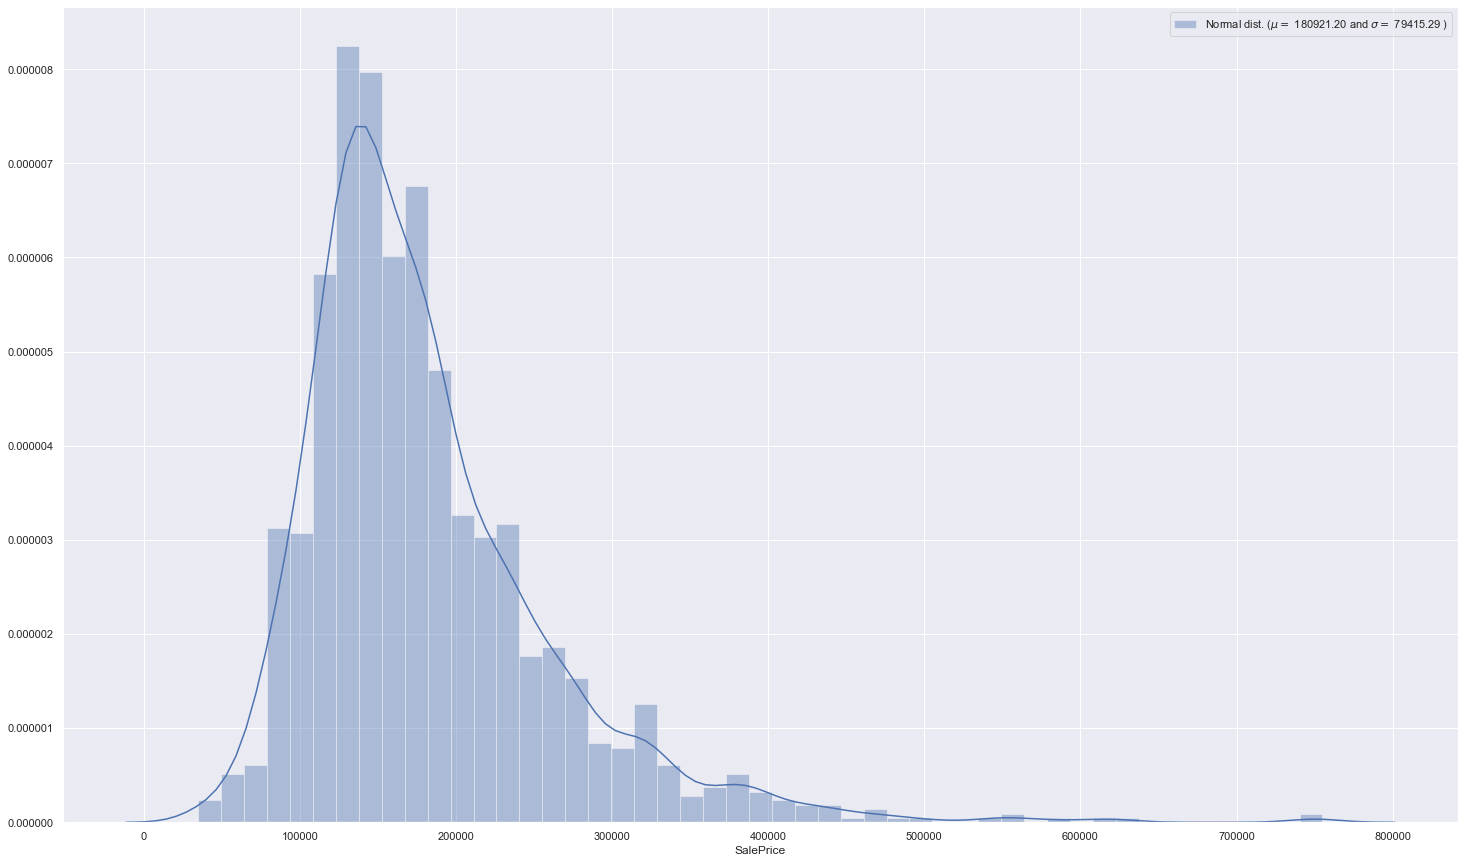

In [9]:
# Distribution of Sale Price:

# Linear models work on the assumption that the distribution of the independent variable and the target variable are 
# similar. Therefore, knowing about the skewness of data helps us in creating better linear models

#train['SalePrice'].describe()
fig = plt.figure(figsize=(25,15))
plt.subplot(1,1,1)
sns.distplot(train['SalePrice']);
(mu, sigma) = norm.fit(train['SalePrice'])
print( 'mu = {:.2f} \nsigma = {:.2f}'.format(mu, sigma))
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)], loc='best')

## Skewness and Kurtosis of the data
print('Skewness = {:.2f}'.format(train['SalePrice'].skew()))
print('Kurtosis = {:.2f}'.format(train['SalePrice'].kurt()))

In [10]:
# Our data is positively skewed here, which means that it has a higher number of data points having low values, 
# i.e., more houses with less price. So when we train our model on this data, it will perform better at predicting 
# the price of homes with lower price when compared to those with higher price.

# Also, skewness tells us about the direction of outliers. We can see from above that our distribution is positively 
# skewed and most of the outliers are present on the right side of the distribution.

mu = 12.02 
sigma = 0.40
Skewness = 0.12
Kurtosis = 0.81


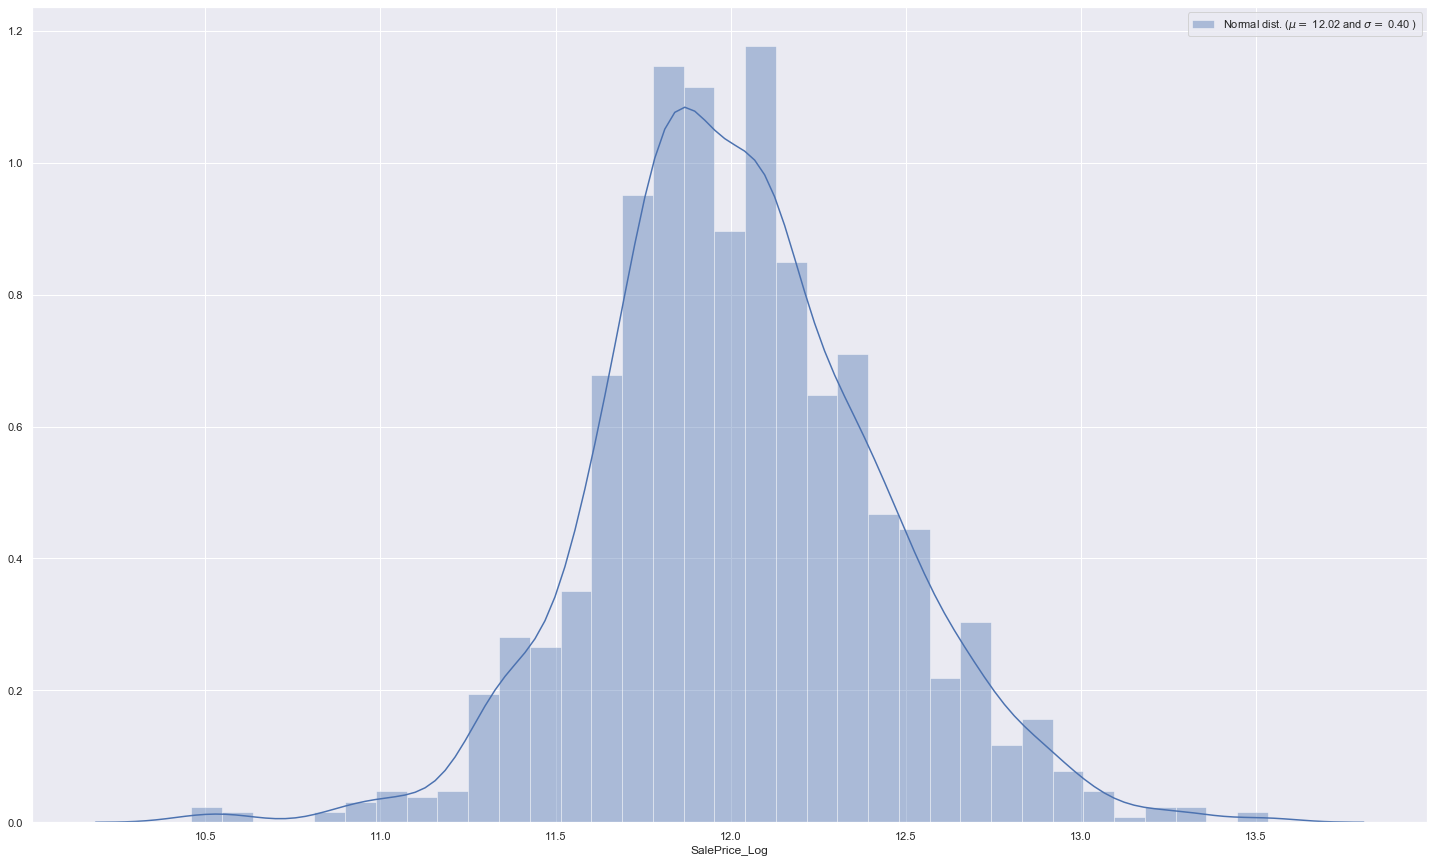

In [11]:
## Fitting log curve to check the distribution with Log Transfornation

train['SalePrice_Log'] = np.log(train['SalePrice'])

## Log Transformed Curve
fig = plt.figure(figsize=(25,15))
plt.subplot(1,1,1)
sns.distplot(train['SalePrice_Log'])
(mu, sigma) = norm.fit(train['SalePrice_Log'])
print( 'mu = {:.2f} \nsigma = {:.2f}'.format(mu, sigma))
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)], loc='best')

## Skewness and Kurtosis of the data
print('Skewness = {:.2f}'.format(train['SalePrice_Log'].skew()))
print('Kurtosis = {:.2f}'.format(train['SalePrice_Log'].kurt()))

In [12]:
## Now the data is normally distributed and moderatly skewed, thus making it suitable for developing linear model.

In [13]:
# Separate the numerical features and categorical features
category_features = train.select_dtypes(include = ["object"]).columns
feat_cat = train[category_features]
print("Total No. of Categorical features are: " + str(len(category_features)))
print(category_features)


print("*"*100)


numerical_features = train.select_dtypes(exclude = ["object"]).columns
feat_num = train[numerical_features]
print("Total No. of Numerical features : " + str(len(numerical_features)))
print(numerical_features)

Total No. of Categorical features are: 43
Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')
****************************************************************************************************
Total No. of Numerical features : 38
Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',


n_rows = 12
n_cols = 3

fig,axs = plt.subplots(n_rows, n_cols, figsize = (n_cols*3.5,n_rows*3))

num_features_list = list(numerical_features)
not_to_plot_list = ['Id','SalePrice','SalePrice_Log']
plot_numerical_features_list = [c for c in list(numerical_features) if c not in not_to_plot_list]

for r in range(0, n_rows):
    for c in range(0, n_cols):
        i = r*n_cols + c
        if i < len(plot_numerical_features_list):
            sns.regplot(train[plot_numerical_features_list[i]], train['SalePrice_Log'], ax = axs[r][c])
            stp = ss.pearsonr(train[plot_numerical_features_list[i]], train['SalePrice_Log'])
            str_title = "r = " + "{0:.2f}".format(stp[0]) + " " "p = " + "{0:.2f}".format(stp[1])
            axs[r][c].set_title(str_title, fontsize = 11)

plt.tight_layout()
plt.show()

In [14]:
# Missing data in training data

train_na = train.isnull().sum()
train_na = train_na[train_na > 0]
train_na.sort_values(ascending = False)

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageYrBlt       81
GarageType        81
GarageFinish      81
GarageQual        81
GarageCond        81
BsmtFinType2      38
BsmtExposure      38
BsmtFinType1      37
BsmtCond          37
BsmtQual          37
MasVnrArea         8
MasVnrType         8
Electrical         1
dtype: int64

In [15]:
total = train.isnull().sum().sort_values(ascending = False)
percent = (train.isnull().sum()/train.isnull().count()).sort_values(ascending=False)
train_update0 = pd.concat([total, percent], axis = 1, keys = ['Total', 'Percent'])
train_update0.head(20)

,Total,Percent
PoolQC,1453,1.00
MiscFeature,1406,0.96
Alley,1369,0.94
Fence,1179,0.81
FireplaceQu,690,0.47
LotFrontage,259,0.18
GarageYrBlt,81,0.06
GarageType,81,0.06
GarageQual,81,0.06
GarageCond,81,0.06


In [16]:
# In the missing data there are 19 features with NaN values, of which 3 are numerical types and 16 are Strings.
# Let us replace the Strings NaN with None and the 3 floating types with the Median value.

In [17]:
# First replace Nan in category

feat_cat.head(10)

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
5,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,...,Attchd,Unf,TA,TA,Y,NaN,MnPrv,Shed,WD,Normal
6,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
7,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,PosN,...,Attchd,RFn,TA,TA,Y,NaN,NaN,Shed,WD,Normal
8,RM,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,...,Detchd,Unf,Fa,TA,Y,NaN,NaN,NaN,WD,Abnorml
9,RL,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,BrkSide,Artery,...,Attchd,RFn,Gd,TA,Y,NaN,NaN,NaN,WD,Normal


In [18]:
# 16 String features:
## PoolQC	 Pool quality
## MiscFeature	 Miscellaneous feature not covered in other categories
## Alley	 Type of alley access
## Fence	 Fence quality
## FireplaceQu	 Fireplace quality

## BsmtFinType2	 Quality of second finished area (if present)
## BsmtExposure	 Walkout or garden level basement walls
## BsmtFinType1	 Quality of basement finished area
## BsmtCond	 General condition of the basement
## BsmtQual	 Height of the basement
## MasVnrType	 Masonry veneer type
## Electrical	 Electrical system

## GarageType	 Garage location
## GarageFinish	 Interior finish of the garage
## GarageQual	 Garage quality
## GarageCond	 Garage condition
# It is quite possible that Garage does not exist for these houses, therefore we will replace this value with None.

In [19]:
for cat in list(feat_cat):
    print(feat_cat[cat].value_counts())
    print('#'*50)

RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64
##################################################
Pave    1454
Grvl       6
Name: Street, dtype: int64
##################################################
Grvl    50
Pave    41
Name: Alley, dtype: int64
##################################################
Reg    925
IR1    484
IR2     41
IR3     10
Name: LotShape, dtype: int64
##################################################
Lvl    1311
Bnk      63
HLS      50
Low      36
Name: LandContour, dtype: int64
##################################################
AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64
##################################################
Inside     1052
Corner      263
CulDSac      94
FR2          47
FR3           4
Name: LotConfig, dtype: int64
##################################################
Gtl    1382
Mod      65
Sev      13
Name: LandSlope, dtype: int64
############################################

In [20]:
## Filling the Missing Values where  NAN has meaning ex.
## This information can be found from the Data Discription



fill_na = ['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual'
, 'GarageCond', 'BsmtFinType2', 'BsmtExposure', 'BsmtFinType1', 'BsmtCond', 'BsmtQual', 'MasVnrType', 'Electrical']

## Replace 'NaN' with 'None' in these columns


for cols in fill_na:
    train[cols].fillna('None',inplace = True)

In [21]:
# Check if any other Nan value in Categorical

total = train.isnull().sum().sort_values(ascending = False)
percent = (train.isnull().sum()/train.isnull().count()).sort_values(ascending = False)
train_update1 = pd.concat([total,percent],axis = 1, keys = ["Total","Percent"])
train_update1.head(10)

,Total,Percent
LotFrontage,259,0.18
GarageYrBlt,81,0.06
MasVnrArea,8,0.01
BsmtQual,0,0.00
RoofMatl,0,0.00
Exterior1st,0,0.00
Exterior2nd,0,0.00
MasVnrType,0,0.00
ExterQual,0,0.00
ExterCond,0,0.00


In [22]:
feat_num.head(10)

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,SalePrice_Log
0,60,65.00,8450,7,5,2003,2003,196.00,706,0,...,61,0,0,0,0,0,2,2008,208500,12.25
1,20,80.00,9600,6,8,1976,1976,0.00,978,0,...,0,0,0,0,0,0,5,2007,181500,12.11
2,60,68.00,11250,7,5,2001,2002,162.00,486,0,...,42,0,0,0,0,0,9,2008,223500,12.32
3,70,60.00,9550,7,5,1915,1970,0.00,216,0,...,35,272,0,0,0,0,2,2006,140000,11.85
4,60,84.00,14260,8,5,2000,2000,350.00,655,0,...,84,0,0,0,0,0,12,2008,250000,12.43
5,50,85.00,14115,5,5,1993,1995,0.00,732,0,...,30,0,320,0,0,700,10,2009,143000,11.87
6,20,75.00,10084,8,5,2004,2005,186.00,1369,0,...,57,0,0,0,0,0,8,2007,307000,12.63
7,60,nan,10382,7,6,1973,1973,240.00,859,32,...,204,228,0,0,0,350,11,2009,200000,12.21
8,50,51.00,6120,7,5,1931,1950,0.00,0,0,...,0,205,0,0,0,0,4,2008,129900,11.77
9,190,50.00,7420,5,6,1939,1950,0.00,851,0,...,4,0,0,0,0,0,1,2008,118000,11.68


In [23]:
for cat in list(feat_num):
    print(feat_num[cat].value_counts())
    print('#'*50)

20     536
60     299
50     144
120     87
30      69
160     63
70      60
80      58
90      52
190     30
85      20
75      16
45      12
180     10
40       4
Name: MSSubClass, dtype: int64
##################################################
60.00     143
70.00      70
80.00      69
50.00      57
75.00      53
         ... 
106.00      1
38.00       1
138.00      1
140.00      1
137.00      1
Name: LotFrontage, Length: 110, dtype: int64
##################################################
7200     25
9600     24
6000     17
10800    14
9000     14
         ..
7094      1
6130      1
9337      1
5232      1
8190      1
Name: LotArea, Length: 1073, dtype: int64
##################################################
5     397
6     374
7     319
8     168
4     116
9      43
3      20
10     18
2       3
1       2
Name: OverallQual, dtype: int64
##################################################
5    821
6    252
7    205
8     72
4     57
3     25
9     22
2      5
1      1
Name: OverallC

In [24]:
# 3 Numerical features:

## LotFrontage	 Linear feet of street connected to property: There should a street connected to the property,
#therefore we will use the median value 


## MasVnrArea	 Masonry veneer area in square feet
# Let us replace this with the Median value 


## GarageYrBlt	 Year garage was built
# It is quite possible that Garage does not exist for these houses, therefore we replace it with Zero

In [25]:
train.fillna(train.median(), inplace = True)

In [26]:
# Check for missing data in training data

print("Missing Status of the Training data:",train.isnull().sum().sum())

Missing Status of the Training data: 0


In [27]:
# No data is now missing

In [28]:
# Separate the numerical features and categorical features
category_features1 = train.select_dtypes(include = ["object"]).columns
feat_cat1 = train[category_features1]
print("Total No. of Categorical features are: " + str(len(category_features1)))
print(category_features1)


print("*"*100)


numerical_features1 = train.select_dtypes(exclude = ["object"]).columns
feat_num1 = train[numerical_features1]
print("Total No. of Numerical features : " + str(len(numerical_features1)))
print(numerical_features1)

Total No. of Categorical features are: 43
Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')
****************************************************************************************************
Total No. of Numerical features : 38
Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',


In [29]:
for col in numerical_features1:
    print('{:15}'.format(col),
          'Skweness:{:05.2f}'.format(train[col].skew()),
          '   ',
          'Kurtosis: {:06.2f}'.format(train[col].kurt())
         )

MSSubClass      Skweness:01.41     Kurtosis: 001.58
LotFrontage     Skweness:02.41     Kurtosis: 021.91
LotArea         Skweness:12.21     Kurtosis: 203.24
OverallQual     Skweness:00.22     Kurtosis: 000.10
OverallCond     Skweness:00.69     Kurtosis: 001.11
YearBuilt       Skweness:-0.61     Kurtosis: -00.44
YearRemodAdd    Skweness:-0.50     Kurtosis: -01.27
MasVnrArea      Skweness:02.68     Kurtosis: 010.14
BsmtFinSF1      Skweness:01.69     Kurtosis: 011.12
BsmtFinSF2      Skweness:04.26     Kurtosis: 020.11
BsmtUnfSF       Skweness:00.92     Kurtosis: 000.47
TotalBsmtSF     Skweness:01.52     Kurtosis: 013.25
1stFlrSF        Skweness:01.38     Kurtosis: 005.75
2ndFlrSF        Skweness:00.81     Kurtosis: -00.55
LowQualFinSF    Skweness:09.01     Kurtosis: 083.23
GrLivArea       Skweness:01.37     Kurtosis: 004.90
BsmtFullBath    Skweness:00.60     Kurtosis: -00.84
BsmtHalfBath    Skweness:04.10     Kurtosis: 016.40
FullBath        Skweness:00.04     Kurtosis: -00.86
HalfBath    

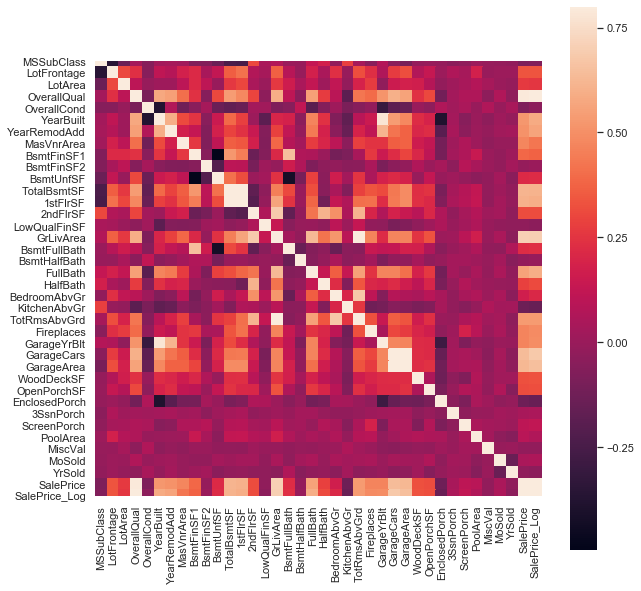

In [30]:
#correlation matrix
corr = train.corr()
f, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(corr, vmax=0.8, square=True);

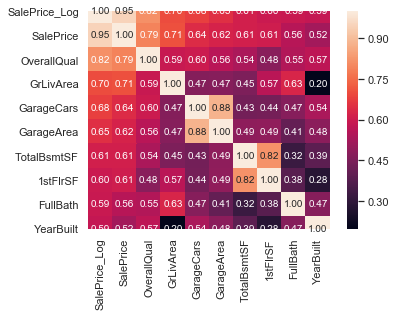

In [31]:
# there are too many variables, so let us focus on the top 10 correlated with the Saleprice

k = 10
cols = corr.nlargest(k, 'SalePrice_Log')['SalePrice_Log'].index
cm = np.corrcoef(train[cols].values.T)
sns.set(font_scale=1)
select_heatmap = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

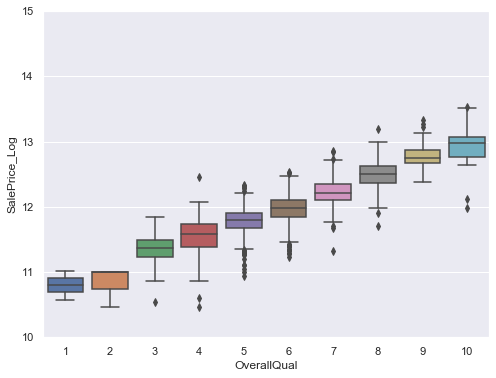

In [32]:
#box plot overallqual/saleprice_Log as there seems to be very high correlation between the 2

var = 'OverallQual'
data = pd.concat([train['SalePrice_Log'], train[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="SalePrice_Log", data=data)
fig.axis(ymin=10, ymax=15);

/Users/amitkumar/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  after removing the cwd from sys.path.
/Users/amitkumar/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  after removing the cwd from sys.path.
/Users/amitkumar/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) a

/Users/amitkumar/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  after removing the cwd from sys.path.


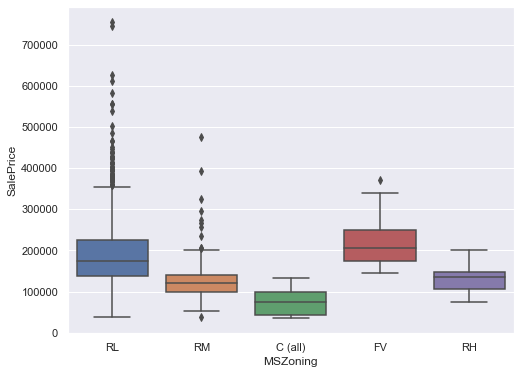

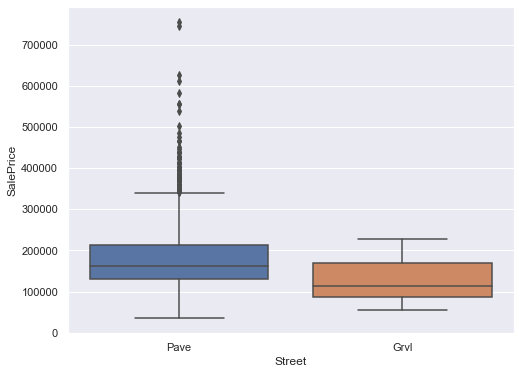

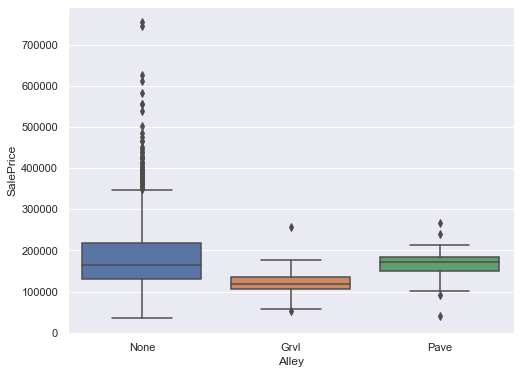

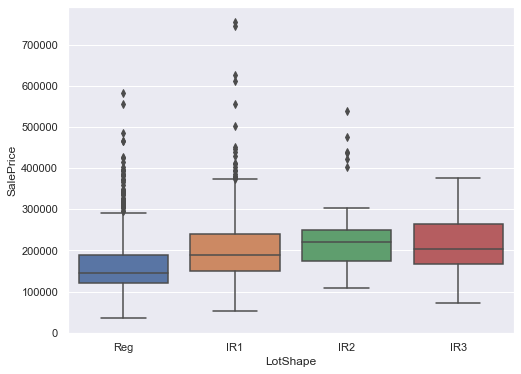

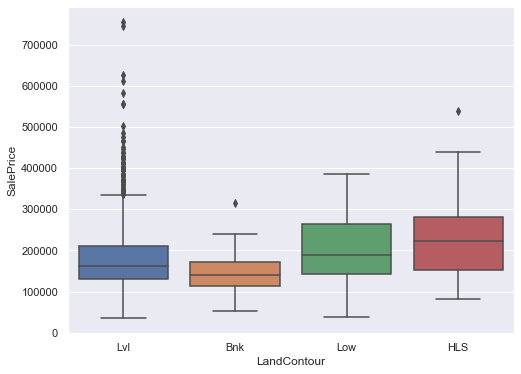

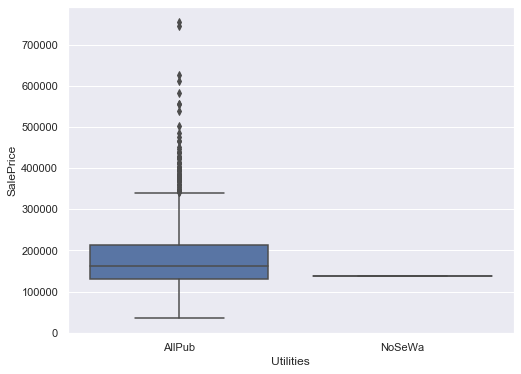

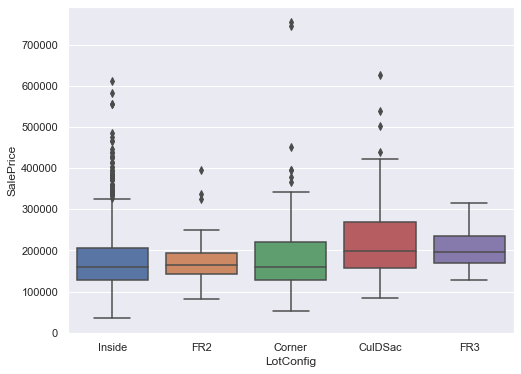

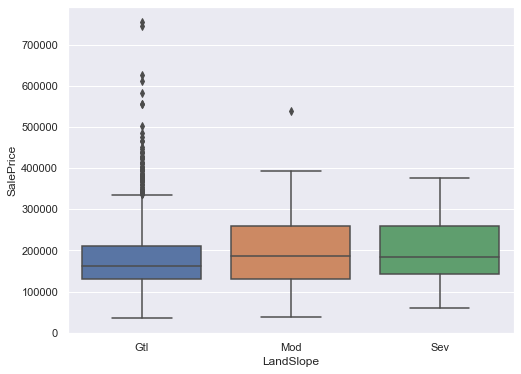

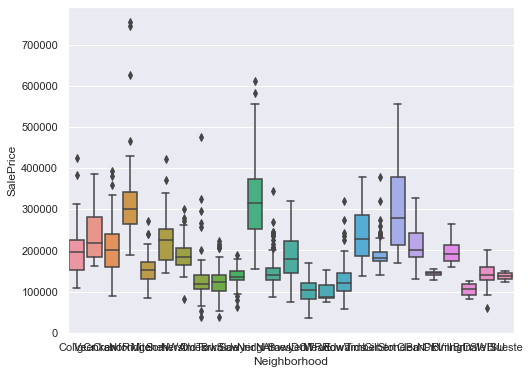

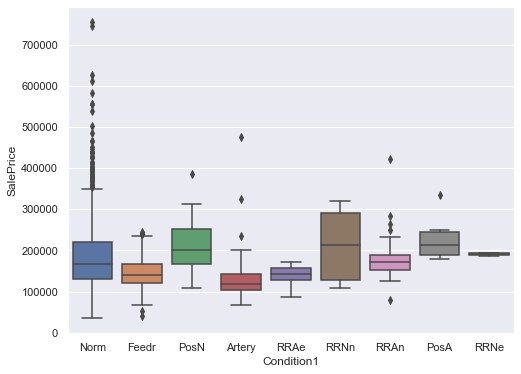

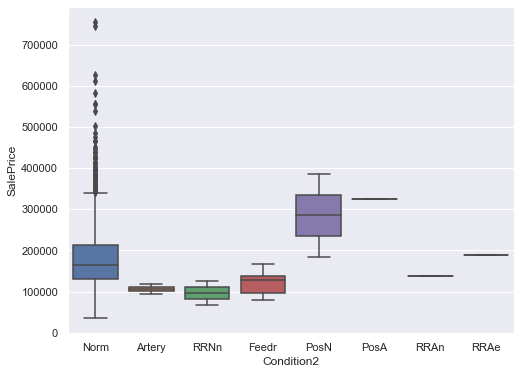

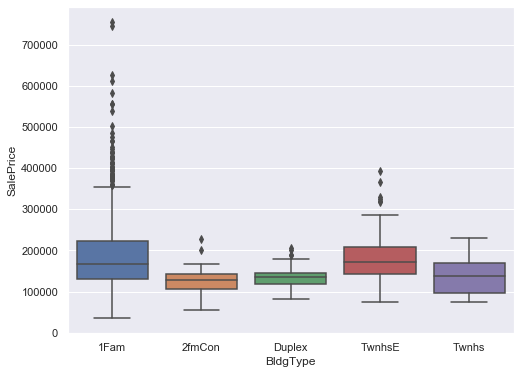

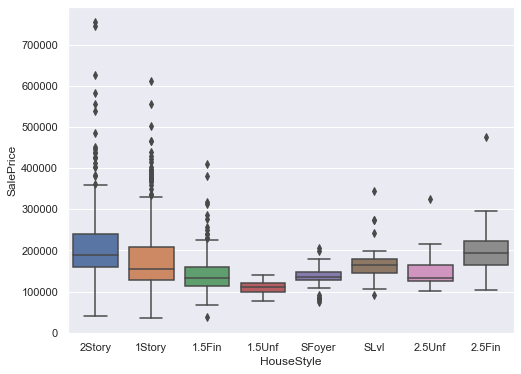

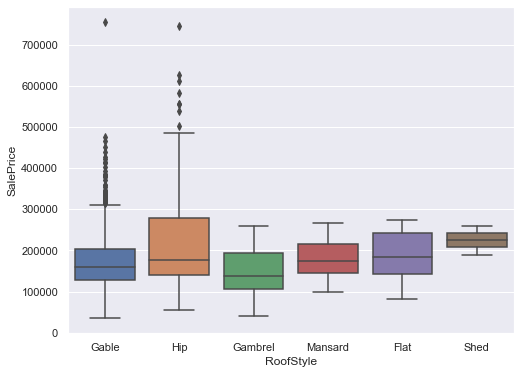

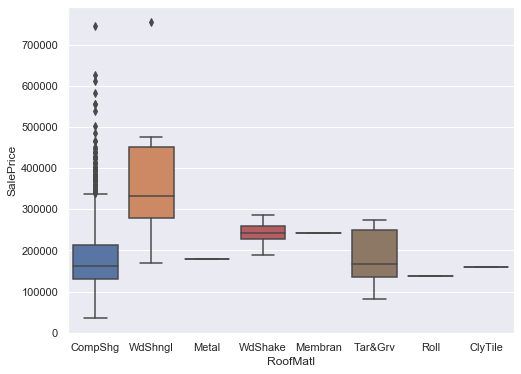

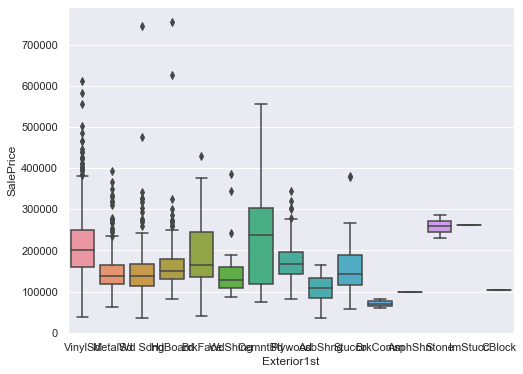

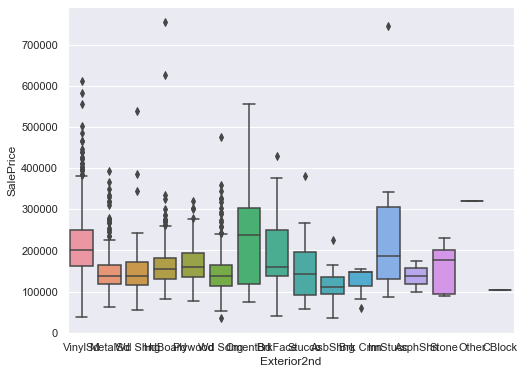

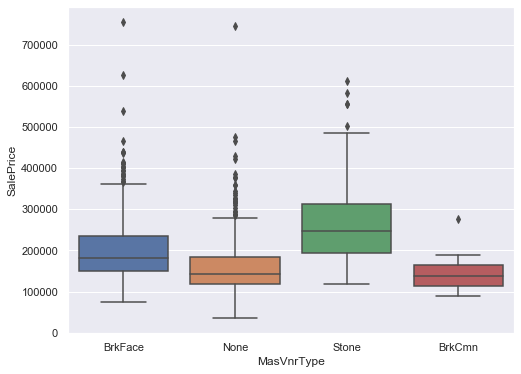

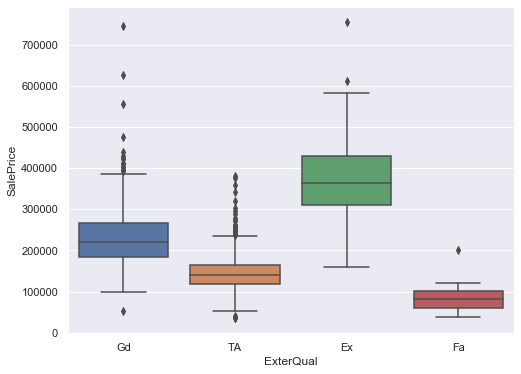

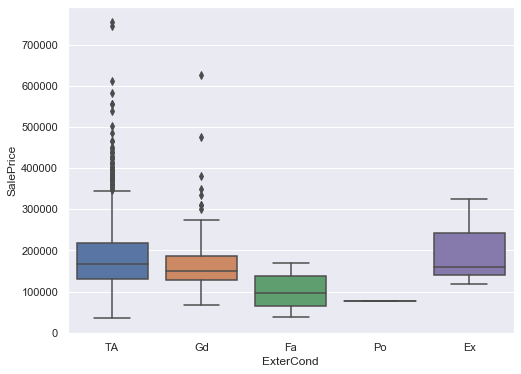

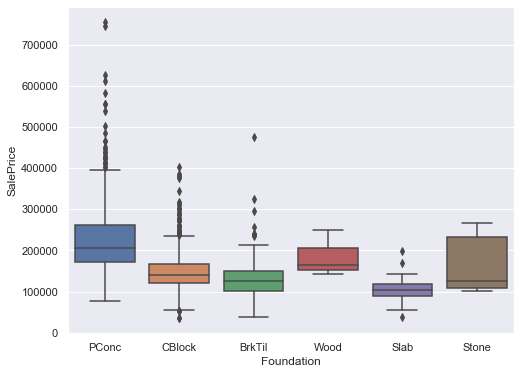

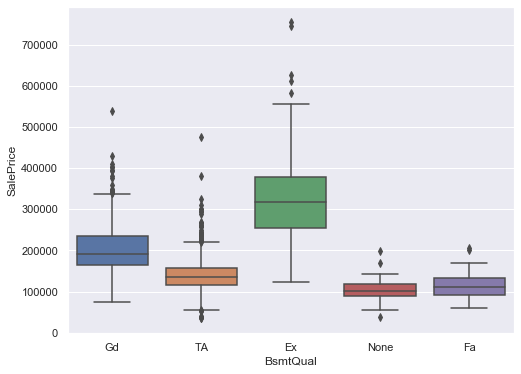

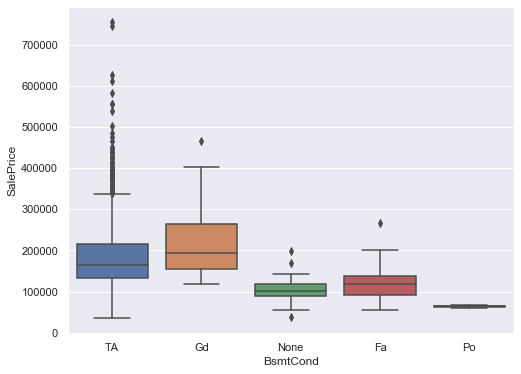

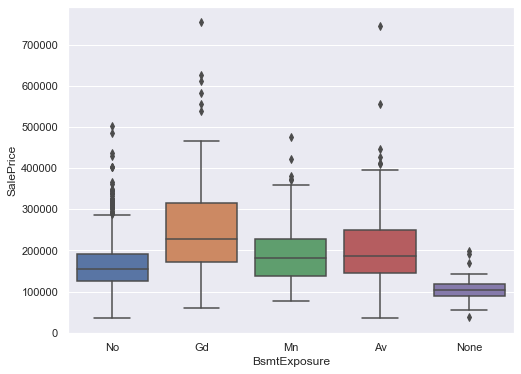

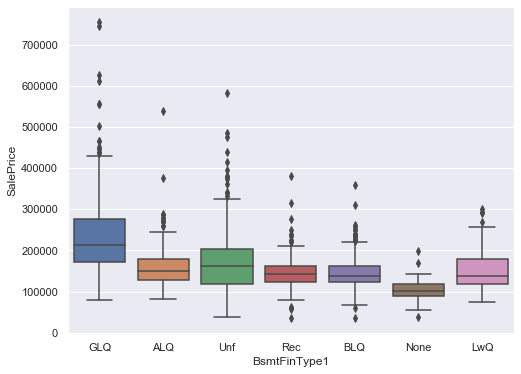

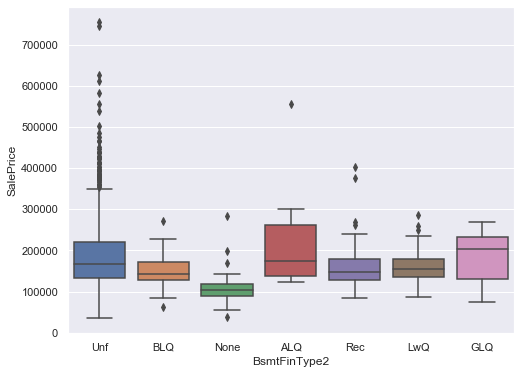

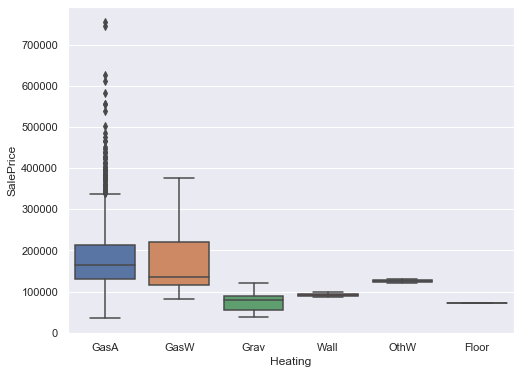

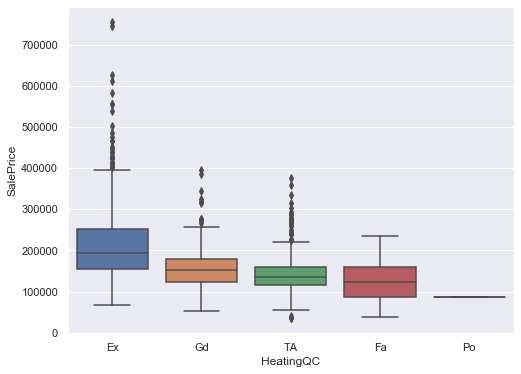

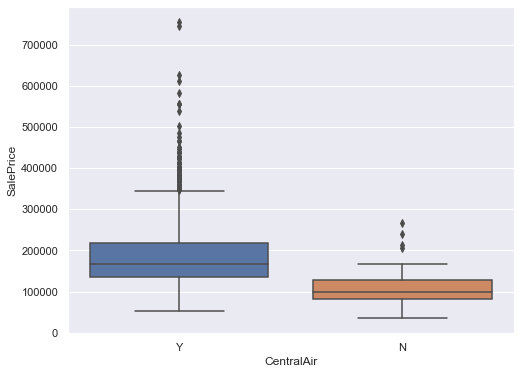

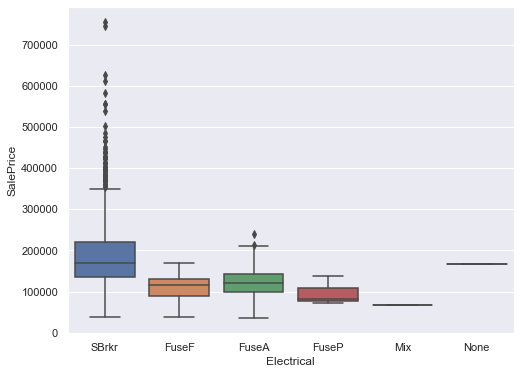

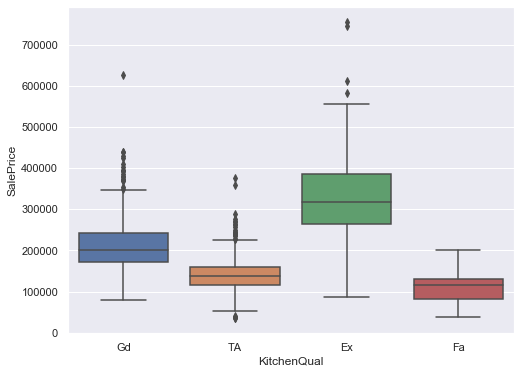

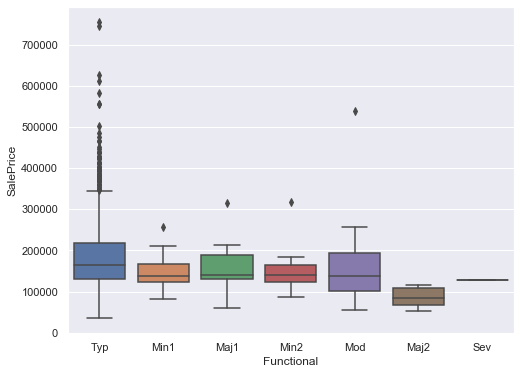

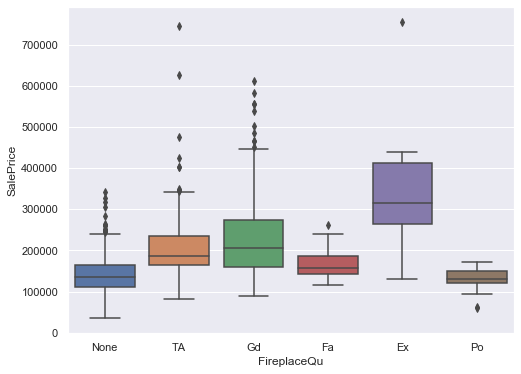

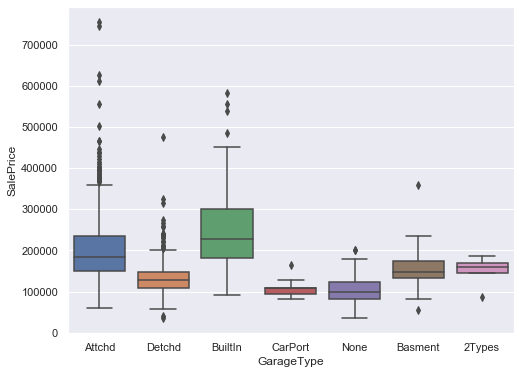

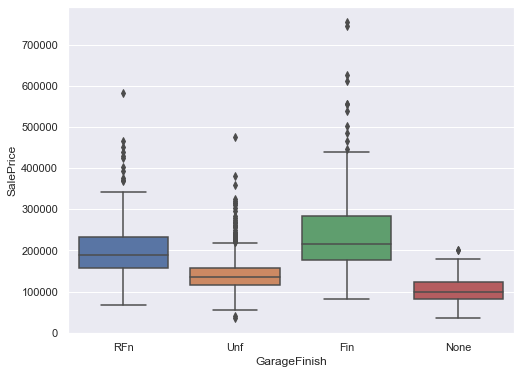

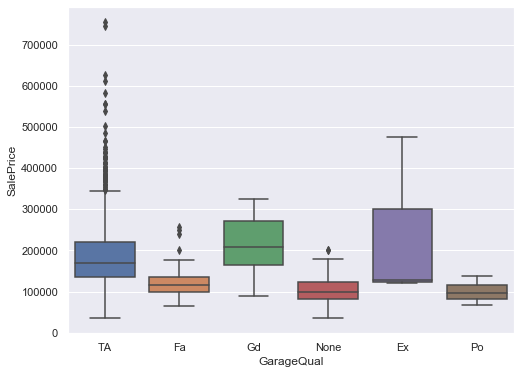

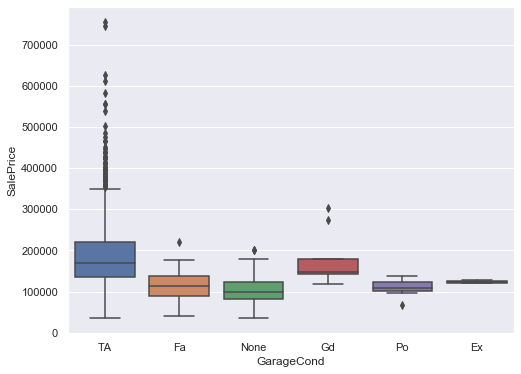

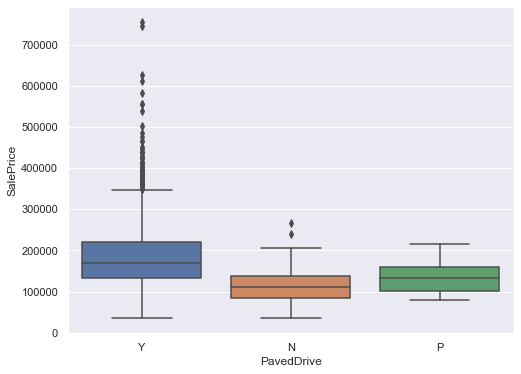

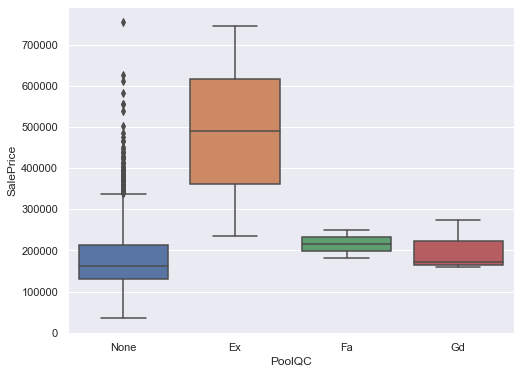

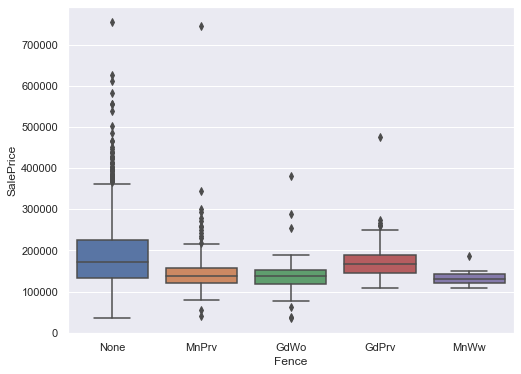

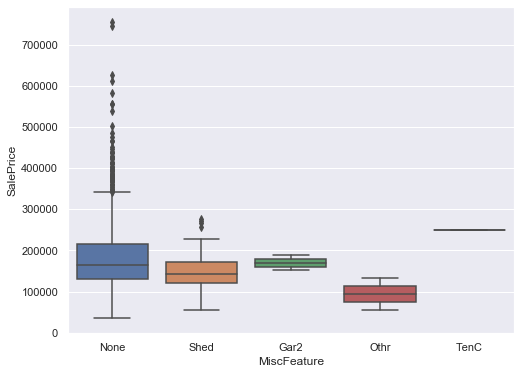

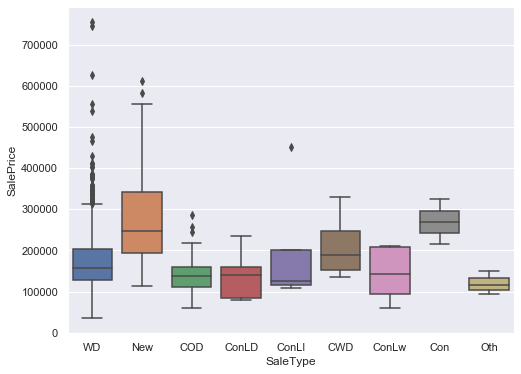

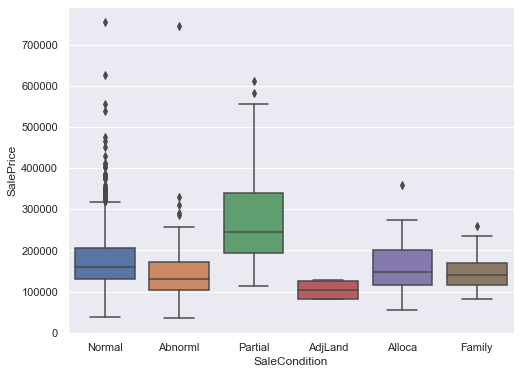

In [33]:
vars_box = feat_cat1
for var in vars_box:
    data = pd.concat([train['SalePrice'], train[var]], axis=1)
    f, ax = plt.subplots(figsize=(8, 6))
    fig = sns.boxplot(x=var, y="SalePrice", data=data)


Histogram of Data of Housing DataFrame:


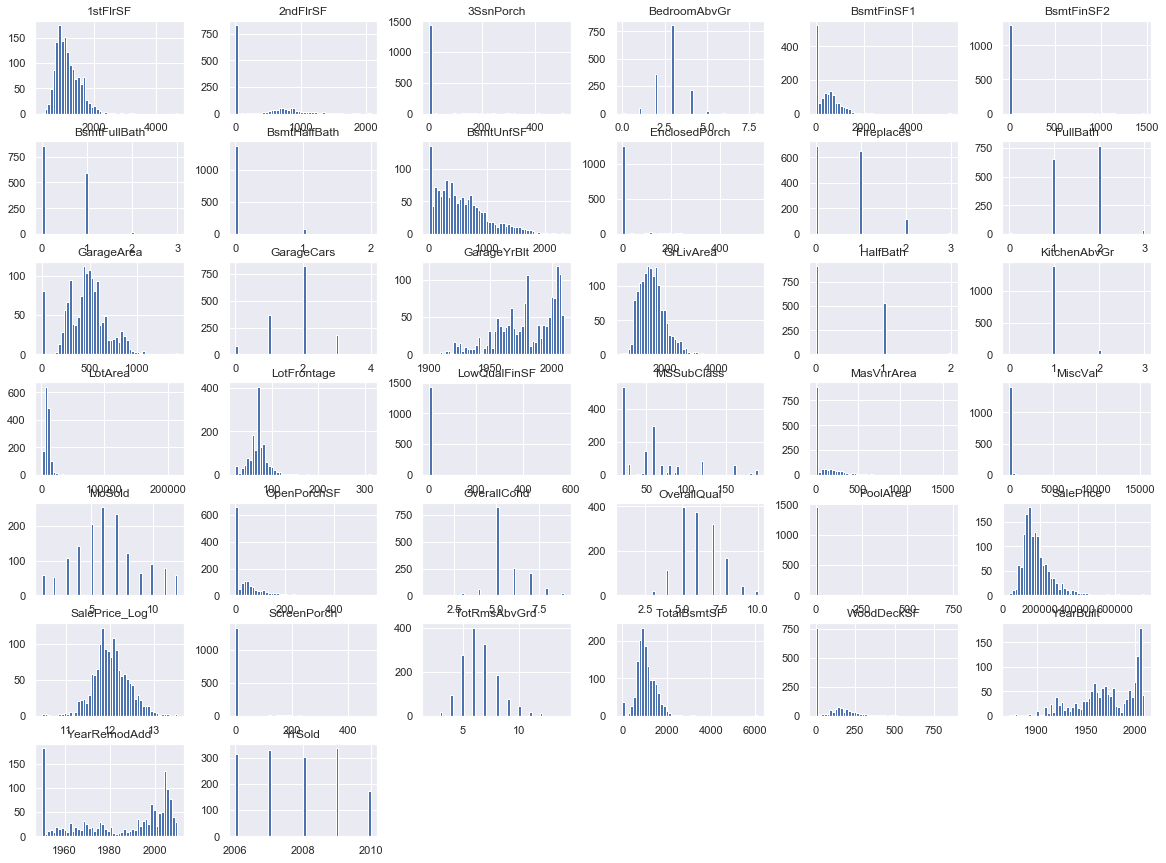

In [34]:
print('\nHistogram of Data of Housing DataFrame:')
feat_num1.hist(bins=50, figsize=(20,15))
plt.show()